<a href="https://colab.research.google.com/github/DonghaeSuh/NLP_Pytorch/blob/main/Preprocessing/Python_NLP_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization

## English Tokenization

In [ ]:
en_text = "A Dog Run back corner near spare bedrooms"

### spaCy

In [ ]:
import spacy
spacy_en=spacy.load('en_core_web_sm')

In [ ]:
def tokenize(en_text):
  return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [ ]:
print(tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### NLTK

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### 띄어쓰기 토큰화

In [ ]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


## 한국어 토큰화

In [ ]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

### 띄어쓰기 토큰화

In [ ]:
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


### KoNLPy

In [2]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 122 (delta 15), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (122/122), 1.27 MiB | 7.53 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [3]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [4]:
!bash install_mecab-ko_on_colab_light_220429.sh

Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 35.5 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-05-04 13:18:45--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::3403:4be7, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20filename%3D%22mecab-0.996-ko-0.9.2.tar.gz%22&response-content-encoding=None&AWSAccessKeyId=

In [ ]:
from konlpy.tag import Mecab
tokenizer=Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


## 문자 토큰화 ( Character level )

In [ ]:
print(list(kor_text))

['사', '과', '의', ' ', '놀', '라', '운', ' ', '효', '능', '이', '라', '는', ' ', '글', '을', ' ', '봤', '어', '.', ' ', '그', '래', '서', ' ', '오', '늘', ' ', '사', '과', '를', ' ', '먹', '으', '려', '고', ' ', '했', '는', '데', ' ', '사', '과', '가', ' ', '썩', '어', '서', ' ', '슈', '퍼', '에', ' ', '가', '서', ' ', '사', '과', '랑', ' ', '오', '렌', '지', ' ', '사', '왔', '어']


In [ ]:
print(list(en_text))

['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']


# 단어 집합 생성

In [5]:
import urllib.request
import pandas as pd
import numpy as np

from konlpy.tag import Mecab
from nltk import FreqDist

import matplotlib.pyplot as plt

In [6]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt',filename='ratings.txt')

('ratings.txt', <http.client.HTTPMessage at 0x7f280675c6d0>)

In [7]:
# read_csv와 read_table의 차이점 : https://stackoverflow.com/questions/31362573/performance-difference-in-pandas-read-table-vs-read-csv-vs-from-csv-vs-read-e
data=pd.read_table('ratings.txt')

In [8]:
data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [9]:
print(len(data))

200000


In [10]:
sample_data=data.sample(n=100)

In [11]:
sample_data.head()

,id,document,label
127203,10227306,유빈아 오빠가 2빠다 ^오^,0
80110,4277434,재미있게 잘 봤습니다. ^-^,1
25353,4013777,감사합니다....,1
97987,9580069,후속작도 이어서 나왔으면 좋겠다.,1
42364,1643613,perfection!,1


In [12]:
## pandas.str : https://blog.naver.com/wideeyed/221603778414
sample_data['document']=sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
sample_data.head()

<ipython-input-12-c5b75e7ce625>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_data['document']=sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
127203,10227306,유빈아 오빠가 빠다 오,0
80110,4277434,재미있게 잘 봤습니다,1
25353,4013777,감사합니다,1
97987,9580069,후속작도 이어서 나왔으면 좋겠다,1
42364,1643613,,1


In [13]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [14]:
tokenizer=Mecab()
tokenized=[]

for i in sample_data['document']:
  temp=tokenizer.morphs(i)
  temp=[word for word in temp if not word in stopwords]
  tokenized.append(temp)

In [15]:
vocab=FreqDist(np.hstack(tokenized)) # concat과 동이한 역할
print(len(vocab))

702


In [16]:
vocab['바보'] # key : 단어 , value: 빈도수

1

In [17]:
vocab_size=500
vocab=vocab.most_common(vocab_size)
print(len(vocab))

500


# 각 단어에 고유한 정수 부여

In [19]:
word_vocab={word[0]:index+2 for index, word in enumerate(vocab)}

In [20]:
word_vocab['pad']=1
word_vocab['unk']=0

In [21]:
encoded=[]
for sent in tokenized:
  temp=[]
  for w in sent:
    try:
      temp.append(word_vocab[w])
    except KeyError:
      temp.append(word_vocab['unk'])
  encoded.append(temp)

In [27]:
encoded[:6]

[[175, 16, 176, 177, 92],
 [93, 7, 23, 40],
 [178, 179],
 [180, 181, 182, 183, 20, 41, 3],
 [],
 [184, 185, 186, 17, 187, 94]]

# Padding

In [28]:
import matplotlib.pyplot as plt

최대길이 : 58
최소길이 : 0
평균길이 : 13.43


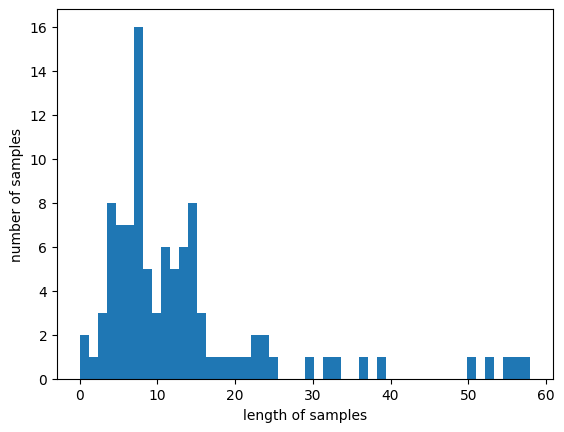

In [33]:
max_len=max(len(i) for i in encoded)
print('최대길이 : {}'.format(max_len))
print('최소길이 : {}'.format(min(len(i) for i in encoded)))
print('평균길이 : {}'.format(sum(map(len,encoded))/len(encoded)))
plt.hist([len(s) for s in encoded],bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [34]:
for line in encoded:
  if len(line)<max_len:
    line+=[word_vocab['pad']]*(max_len-len(line))

In [35]:
print('최대길이 : {}'.format(max_len))
print('최소길이 : {}'.format(min(len(i) for i in encoded)))
print('평균길이 : {}'.format(sum(map(len,encoded))/len(encoded)))

최대길이 : 58
최소길이 : 58
평균길이 : 58.0


In [38]:
print(encoded[:2])

[[175, 16, 176, 177, 92, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [93, 7, 23, 40, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
